/tmp/ipykernel_43917/1566994249.py:184: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range('2023-01-01', periods=10, freq='M')



MISSING DATA ANALYSIS
email: 2 missing (20.00%)
transaction_date: 2 missing (20.00%)
department: 2 missing (20.00%)


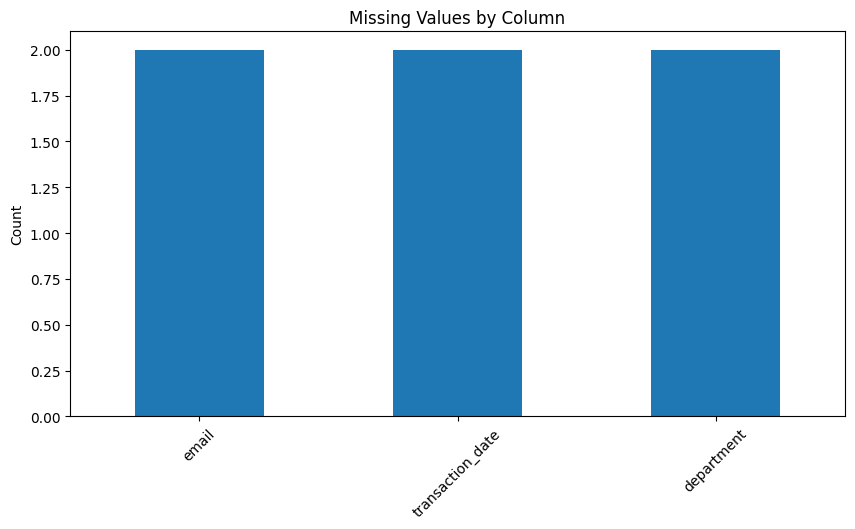


DUPLICATE DATA ANALYSIS
Total duplicate rows: 0
Duplicate supplier_name values: 5
Duplicate product_id values: 3

INCONSISTENT FORMATTING ANALYSIS
transaction_date: Inconsistent date formats detected
phone: 2 records with non-standard phone formats
state: 2 records with non-standard state abbreviations

DATA DRIFT ANALYSIS
Mean drift percentage: 9.41%
KS test p-value: 0.0000


/tmp/ipykernel_43917/1566994249.py:142: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = time_series.resample(time_period).mean()


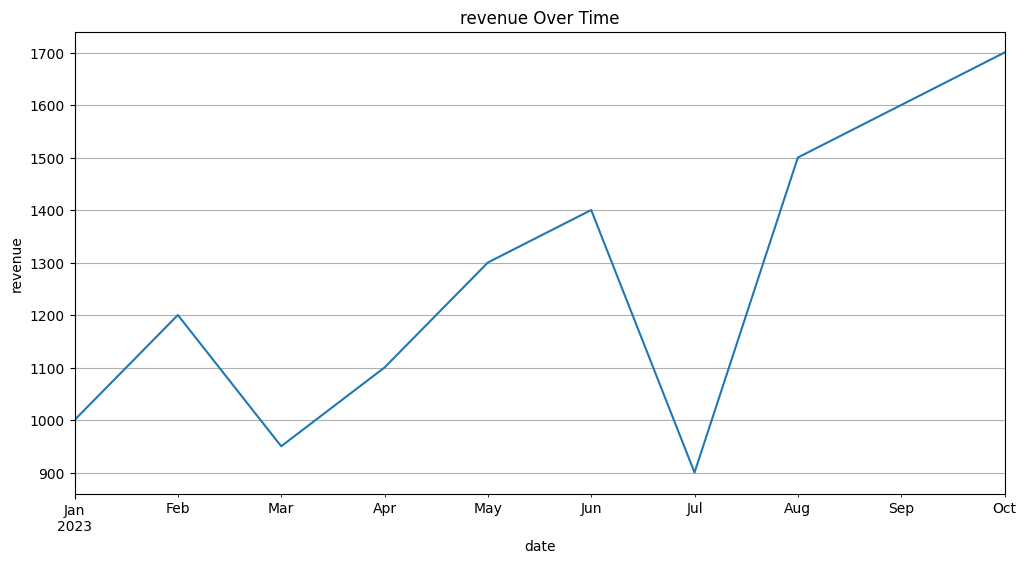

In [1]:
# Data Profiling Techniques Examples

# 1. Descriptive Statistics:
# Task 1: Calculate the mean, median, and mode for sales figures in a retail dataset.
# Task 2: Analyze the average age, median, and mode in a customer demographic
# dataset.
# Task 3: Determine the mean, median, and mode of daily website visit counts.






# 2. Distribution Analysis:
# Task 1: Visualize the distribution of product prices using histograms.
# Task 2: Create a distribution chart for exam scores in an educational dataset.
# Task 3: Analyze the distribution of order quantities for inventory management.






# 3. Data Type Validation:
# Task 1: Validate numeric fields in a dataset to ensure they contain only numbers.
# Task 2: Check for valid date formats in a transaction log.
# Task 3: Validate email formats in a customer contact dataset.


import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats

# ==============================================
# 1. Missing Data Analysis
# ==============================================

def analyze_missing_data(df, columns_to_check):
    """Analyze missing data in specified columns"""
    print("\nMISSING DATA ANALYSIS")
    print("="*50)
    
    results = {}
    for col in columns_to_check:
        missing_count = df[col].isnull().sum()
        missing_pct = (missing_count / len(df)) * 100
        results[col] = {
            'missing_count': missing_count,
            'missing_pct': missing_pct
        }
        print(f"{col}: {missing_count} missing ({missing_pct:.2f}%)")
    
    # Visualize missing data
    plt.figure(figsize=(10, 5))
    df[columns_to_check].isnull().sum().plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
    return results

# ==============================================
# 2. Duplicate Data Analysis
# ==============================================

def analyze_duplicates(df, columns_to_check=None, exact_duplicates=True):
    """Analyze duplicate data"""
    print("\nDUPLICATE DATA ANALYSIS")
    print("="*50)
    
    results = {}
    
    if exact_duplicates:
        # Check for exact duplicate rows
        duplicates = df.duplicated().sum()
        print(f"Total duplicate rows: {duplicates}")
        results['exact_duplicates'] = duplicates
    
    if columns_to_check:
        # Check for duplicates in specific columns
        for col in columns_to_check:
            duplicates = df.duplicated(subset=[col]).sum()
            print(f"Duplicate {col} values: {duplicates}")
            results[f"duplicate_{col}"] = duplicates
    
    return results

# ==============================================
# 3. Inconsistent Formatting Analysis
# ==============================================

def analyze_inconsistent_formatting(df, format_rules):
    """Analyze inconsistent formatting"""
    print("\nINCONSISTENT FORMATTING ANALYSIS")
    print("="*50)
    
    results = {}
    
    for col, check_type in format_rules.items():
        if check_type == 'date':
            # Check for inconsistent date formats
            try:
                pd.to_datetime(df[col], errors='raise')
                print(f"{col}: All dates have consistent format")
                results[col] = 'consistent'
            except:
                print(f"{col}: Inconsistent date formats detected")
                results[col] = 'inconsistent'
        
        elif check_type == 'phone':
            # Check phone number formats (simple check for digits only)
            non_numeric = df[col].str.contains(r'[^0-9\-\(\) ]', na=False).sum()
            print(f"{col}: {non_numeric} records with non-standard phone formats")
            results[col] = non_numeric
        
        elif check_type == 'state':
            # Check for non-standard state abbreviations (assuming 2-letter codes)
            non_standard = df[col].str.match(r'^[A-Z]{2}$', na=False)
            non_standard_count = (~non_standard).sum()
            print(f"{col}: {non_standard_count} records with non-standard state abbreviations")
            results[col] = non_standard_count
    
    return results

# ==============================================
# 4. Data Drift Analysis
# ==============================================

def analyze_data_drift(df, date_col, value_col, time_period='M'):
    """Analyze data drift over time"""
    print("\nDATA DRIFT ANALYSIS")
    print("="*50)
    
    # Convert to datetime if needed
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Resample by time period
    time_series = df.set_index(date_col)[value_col]
    resampled = time_series.resample(time_period).mean()
    
    # Calculate drift metrics
    mean_drift = resampled.pct_change().mean()
    ks_stat, ks_p = stats.kstest(resampled.values, 'norm')
    
    print(f"Mean drift percentage: {mean_drift:.2%}")
    print(f"KS test p-value: {ks_p:.4f}")
    
    # Visualize
    plt.figure(figsize=(12, 6))
    resampled.plot(title=f'{value_col} Over Time')
    plt.ylabel(value_col)
    plt.grid(True)
    plt.show()
    
    return {
        'mean_drift': mean_drift,
        'ks_pvalue': ks_p,
        'resampled_data': resampled
    }

# ==============================================
# Example Usage with Sample Data
# ==============================================

if __name__ == "__main__":
    # Create sample data for demonstration
    data = {
        'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'email': ['a@test.com', 'b@test.com', None, 'd@test.com', 'e@test.com', 
                 'f@test.com', None, 'h@test.com', 'i@test.com', 'j@test.com'],
        'transaction_date': ['01/01/2023', '02/15/2023', '03-10-2023', '04/05/2023', 
                            '05/20/2023', None, '07/01/2023', '08-15-2023', '09/10/2023', None],
        'department': ['Sales', 'IT', 'HR', 'Sales', None, 'IT', 'HR', None, 'Finance', 'Marketing'],
        'supplier_name': ['ABC Inc', 'XYZ Corp', 'ABC Inc', '123 Ltd', 'XYZ Corp', 
                         'ABC Inc', '456 Co', '123 Ltd', '456 Co', '789 Partners'],
        'product_id': ['P100', 'P101', 'P102', 'P100', 'P103', 'P104', 'P102', 'P105', 'P106', 'P100'],
        'phone': ['(123) 456-7890', '123-456-7890', '1234567890', '(987) 654-3210', 
                 '987 654 3210', '555-1234', 'invalid', '(111) 222-3333', '444.555.6666', '7778889999'],
        'state': ['CA', 'NY', 'Calif', 'TX', 'NY', 'FL', 'California', 'IL', 'OH', 'WA'],
        'revenue': [1000, 1200, 950, 1100, 1300, 1400, 900, 1500, 1600, 1700],
        'date': pd.date_range('2023-01-01', periods=10, freq='M')
    }
    df = pd.DataFrame(data)
    
    # 1. Missing Data Analysis
    missing_results = analyze_missing_data(df, ['email', 'transaction_date', 'department'])
    
    # 2. Duplicate Data Analysis
    duplicate_results = analyze_duplicates(
        df, 
        columns_to_check=['supplier_name', 'product_id'],
        exact_duplicates=True
    )
    
    # 3. Inconsistent Formatting Analysis
    format_rules = {
        'transaction_date': 'date',
        'phone': 'phone',
        'state': 'state'
    }
    format_results = analyze_inconsistent_formatting(df, format_rules)
    
    # 4. Data Drift Analysis
    drift_results = analyze_data_drift(df, 'date', 'revenue', 'M')






